In [338]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import hist
%matplotlib inline

def get_countries_stats(*as_of_date):

    countries_all = np.unique(tb[['home_team', 'away_team']].values)

    home_goals = []
    away_goals = []
    total_goals = []
    no_home_games = []
    no_away_games = []
    win_games = []
    win_games_away = []
    win_games_home = []
    loss_games = []
    loss_games_away = []
    loss_games_home = []
    draws_games = []
    draws_games_away = []
    draws_games_home = []
    total_games = []
    win_percentage = []
    loss_percentage = []
    draw_percentage = []
    win_percentage_as_home = []
    win_percentage_as_away = []
    loss_percentage_as_home = []
    loss_percentage_as_away = []
    draw_percentage_as_home = []
    draw_percentage_as_away = []

    as_of_is_specified = False
    if len(as_of_date) > 0 :
        as_of_is_specified = True

    for country in countries_all:
        is_country_as_home = None
        is_country_as_away = None
        country_rows_as_home = None
        country_rows_as_away = None
        country_rows_win_as_home = None
        country_rows_win_as_away = None
        country_rows_draws_as_home = None
        country_rows_draws_as_away = None
        country_rows_draw = None
        country_rows = None

        if as_of_is_specified:
            country_rows = tb[(tb['date'] > as_of_date[0]) & ((tb['home_team'] == country) | (tb['away_team'] == country))]
            is_country_as_home = (country_rows['home_team'] == country)
            is_country_as_away = (country_rows['away_team'] == country)
            country_rows_as_home = country_rows[is_country_as_home]
            country_rows_as_away = country_rows[is_country_as_away]
        else:
            country_rows = tb[((tb['home_team'] == country) | (tb['away_team'] == country))]
            is_country_as_home = country_rows['home_team'] == country
            is_country_as_away = country_rows['away_team'] == country
            country_rows_as_home = country_rows[is_country_as_home]
            country_rows_as_away = country_rows[is_country_as_away]



        country_rows_win_as_home = country_rows_as_home[country_rows_as_home['home_score'] > country_rows_as_home['away_score']]
        country_rows_losses_as_home = country_rows_as_home[country_rows_as_home['home_score'] < country_rows_as_home['away_score']]
        country_rows_draws_as_home = country_rows_as_home[country_rows_as_home['home_score'] == country_rows_as_home['away_score']]
        country_rows_win_as_away = country_rows_as_away[country_rows_as_away['home_score'] > country_rows_as_away['away_score']]
        country_rows_losses_as_away = country_rows_as_away[country_rows_as_away['home_score'] < country_rows_as_away['away_score']]
        country_rows_draws_as_away = country_rows_as_away[country_rows_as_away['home_score'] == country_rows_as_away['away_score']]


        total_games_as = len(country_rows)
        total_wins_as_home = len(country_rows_win_as_home)
        total_wins_as_away = len(country_rows_win_as_away)
        total_losses_as_home = len(country_rows_losses_as_home)
        total_losses_as_away = len(country_rows_losses_as_away)
        total_draws_as_home = len(country_rows_draws_as_home)
        total_draws_as_away = len(country_rows_draws_as_away)
        total_wins = total_wins_as_home + total_wins_as_away
        total_losses = total_losses_as_home + total_losses_as_away
        total_draws = total_draws_as_home + total_draws_as_away

        total_games_as_home = len(country_rows_as_home)
        total_games_as_away = len(country_rows_as_away)
        total_goals_as_home = country_rows_as_home['home_score'].sum()
        total_goals_as_away = country_rows_as_away['away_score'].sum()

        win_perc = total_wins / total_games_as if total_games_as > 0 else 0
        loss_perc = total_losses / total_games_as if total_games_as > 0 else 0
        draw_perc = total_draws / total_games_as if total_games_as > 0 else 0

        # if country == 'Canada':
        #     print(total_games_as, total_wins + total_losses + total_draws, total_wins, total_losses, total_draws)
        #     print(country_rows)

        home_goals.append(total_goals_as_home)
        away_goals.append(total_goals_as_away)
        total_goals.append(total_goals_as_home + total_goals_as_away)
        no_home_games.append(total_games_as_home)
        no_away_games.append(total_games_as_away)
        win_games.append(total_wins)
        win_games_away.append(total_wins_as_away)
        win_games_home.append(total_wins_as_home)
        loss_games.append(total_losses)
        loss_games_away.append(total_losses_as_away)
        loss_games_home.append(total_losses_as_home)
        draws_games.append(total_draws)
        draws_games_away.append(total_draws_as_away)
        draws_games_home.append(total_draws_as_home)
        total_games.append(total_games_as)
        win_percentage.append(win_perc)
        loss_percentage.append(loss_perc)
        draw_percentage.append(draw_perc)
        win_percentage_as_home.append((total_wins_as_home / total_games_as_home) if total_games_as_home > 0 else 0)
        win_percentage_as_away.append(total_wins_as_away / total_games_as_away if total_games_as_away > 0 else 0)
        loss_percentage_as_home.append(total_losses_as_home / total_games_as_home if total_games_as_home > 0 else 0)
        loss_percentage_as_away.append(total_losses_as_away / total_games_as_away if total_games_as_away > 0 else 0)
        draw_percentage_as_home.append(total_draws_as_home / total_games_as_home if total_games_as_home > 0 else 0)
        draw_percentage_as_away.append(total_draws_as_away / total_games_as_away if total_games_as_away > 0 else 0)

    entries = {
        'country': countries_all,
        'wins': win_games,
        'losses': loss_games,
        'draws': draws_games,
        'total_games': total_games,
        'home_goals': home_goals,
        'away_goals': away_goals,
        'total_goals': total_goals,
        'home_games': no_home_games,
        'away_games': no_away_games,
        'wins_as_away': win_games_away,
        'wins_as_home': win_games_home,
        'losses_as_away': loss_games_away,
        'losses_as_home': loss_games_home,
        'draws_as_away' : draws_games_away,
        'draws_as_home': draws_games_home,
        'win_percentage': win_percentage,
        'loss_percentage': loss_percentage,
        'draw_percentage': draw_percentage,
        'win_percentage_as_home': win_percentage_as_home,
        'win_percentage_as_away': win_percentage_as_away,
        'loss_percentage_as_home': loss_percentage_as_home,
        'loss_percentage_as_away': loss_percentage_as_away,
        'draw_percentage_as_home': draw_percentage_as_home,
        'draw_percentage_as_away': draw_percentage_as_away
    }

    return pd.DataFrame(entries)

def find_country_with_most_goals_since_2010():
    country_stats_asof_2010 = get_countries_stats('2010-01-01')
    return country_stats_asof_2010[country_stats_asof_2010['total_goals'] == country_stats_asof_2010.max()['total_goals']]['country']

tb = pd.read_csv('data/results.csv')
#setting up values for our new column
tb['total_goals'] = tb['home_score'] + tb['away_score']
tb['home_win'] = np.where(tb['neutral'] == False, tb['home_score'] > tb['away_score'], '')

In [339]:
#average goals for home team
average_home_score = tb['home_score'].mean()
print('The average number of goals for the home team is %s goals' % average_home_score)

The average number of goals for the home team is 1.745755783196268 goals


In [340]:
#average goals for away team
average_away_score = tb['away_score'].mean()
print('The average number of goals for the away team is %s goals' % average_away_score)

The average number of goals for the away team is 1.187587168758717 goals


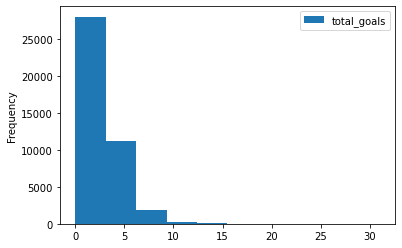

In [341]:
#making the histogram
tb.plot(x='date', y='total_goals', kind='hist')

In [342]:
#home team's win percentage
# total_home_wins_perc = (tb['home_win'].astype('str').value_counts()['True'] / tb.count()) * 100
total_home_wins_perc = (len(tb[tb['home_win'] == 'True']) / len(tb)) * 100
print('The home team has a %s percent chance of winning a game' % round(total_home_wins_perc, 2))

The home team has a 38.01 percent chance of winning a game


In [343]:
# country with most goals since 2010
country_with_most_goals_asof_2010 = find_country_with_most_goals_since_2010()
print('The FIFA country with the most goals since 2010 is %s' % country_with_most_goals_asof_2010)


The FIFA country with the most goals since 2010 is 104    Germany
Name: country, dtype: object
